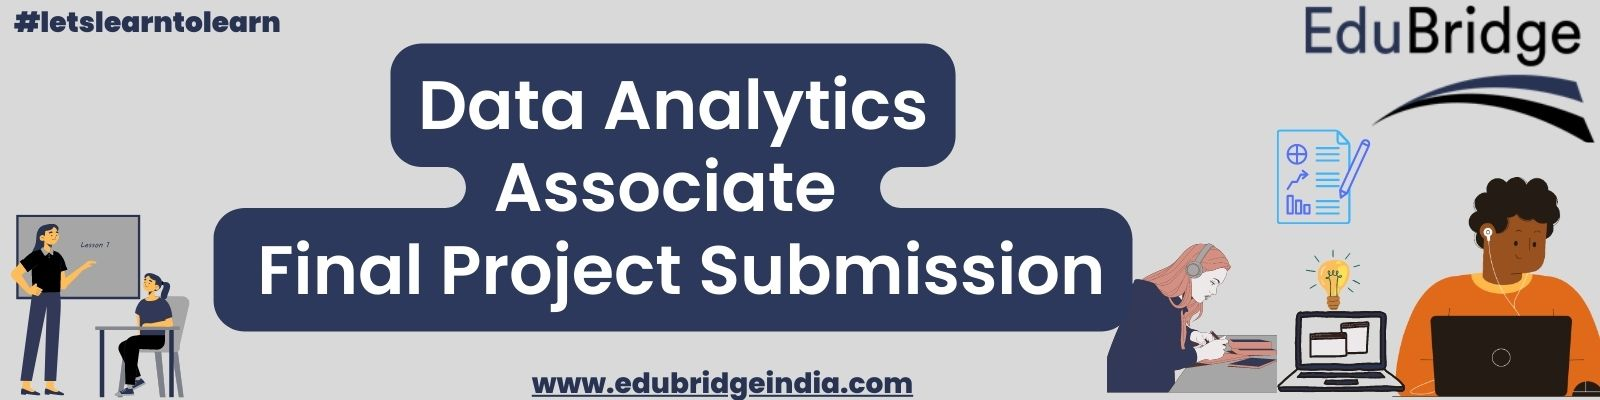

# Data Science Project – Student Performance Analysis with Machine Learning
### By- Samadhan Kale [Pune EXL-2021]-DA Batch-7236
### Guidance- Karthick sir

# Step 1) collecting data

### import basic libraries and load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\samadhan ashok kale\Downloads\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check dataset size and describe the numeric variables

In [5]:
print(data.shape)
print(data.describe())

(1000, 8)
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


# Step 2) Data Preparation / Visualization

 ### Call a pairplot to get the correlation between the numeric variables - math, reading and writing scores

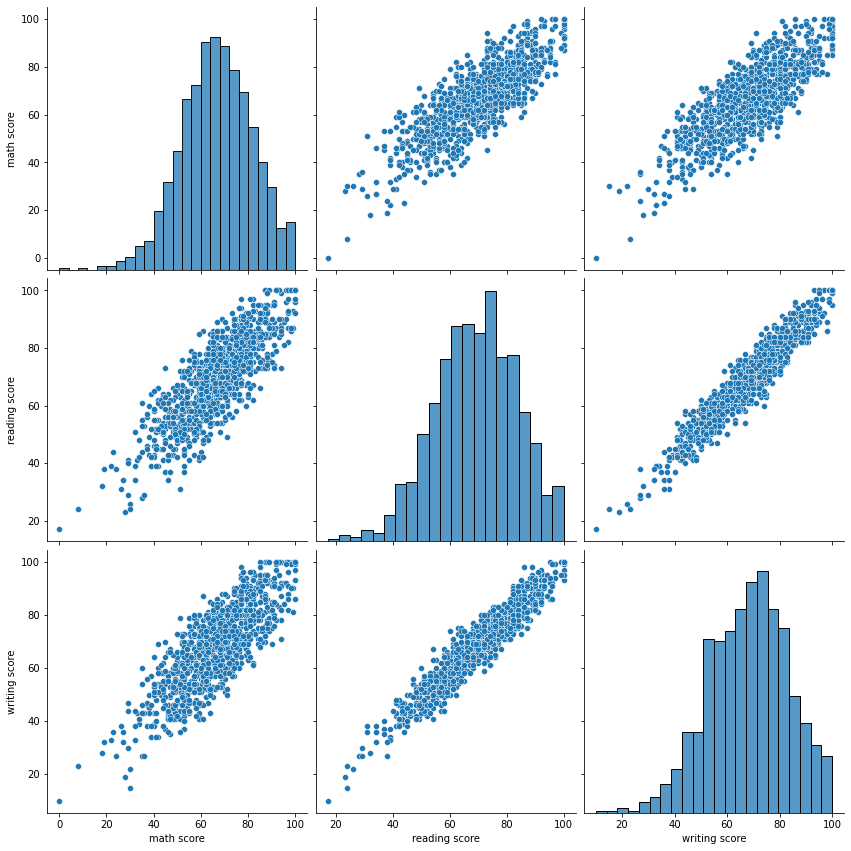

In [6]:
sns.pairplot(data[['math score', 'reading score', 'writing score']], height = 4)

### add columns for grade marks for each exam:

,>90 = A, >80 = B, >70 = C, >60 = D, >50 = E, <=50 = F

In [8]:
def ScoreMark(score):
    if ( score > 90 ):
        mark = 'A'
    elif ( score > 80):
        mark = 'B'
    elif ( score > 70):
        mark = 'C'
    elif ( score > 60):
        mark = 'D'
    elif ( score > 50):
        mark = 'E'
    else: 
        mark = 'F'
    return mark

data['math mark'] = data['math score'].apply(lambda s: ScoreMark(s))
data['reading mark'] = data['reading score'].apply(lambda s: ScoreMark(s))
data['writing mark'] = data['writing score'].apply(lambda s: ScoreMark(s))

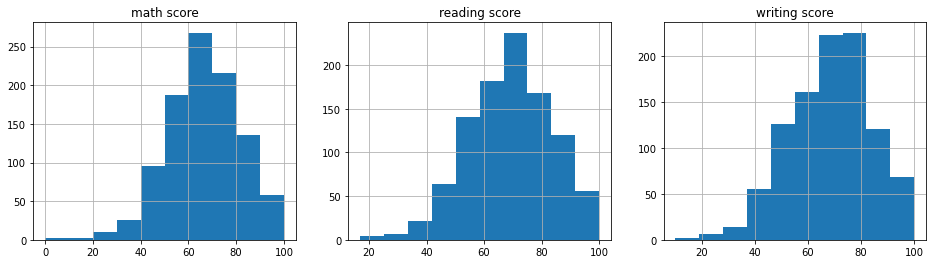

In [9]:
## Plot histograms for the exam scores and marks
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math score', 'reading score', 'writing score']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    data[i].hist()
    n = n + 1

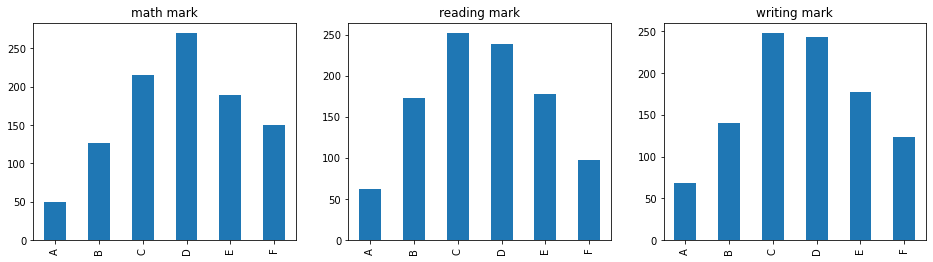

In [10]:
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math mark', 'reading mark', 'writing mark']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    data[i].value_counts().sort_index().plot(kind="bar")
    n = n + 1

In [11]:
## Define Boxplot function, to plot all three exam scores for different variables, check median and quartiles of the scores.
def boxpl(dt, x_cols, y_cols):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=20)
            n = n + 1

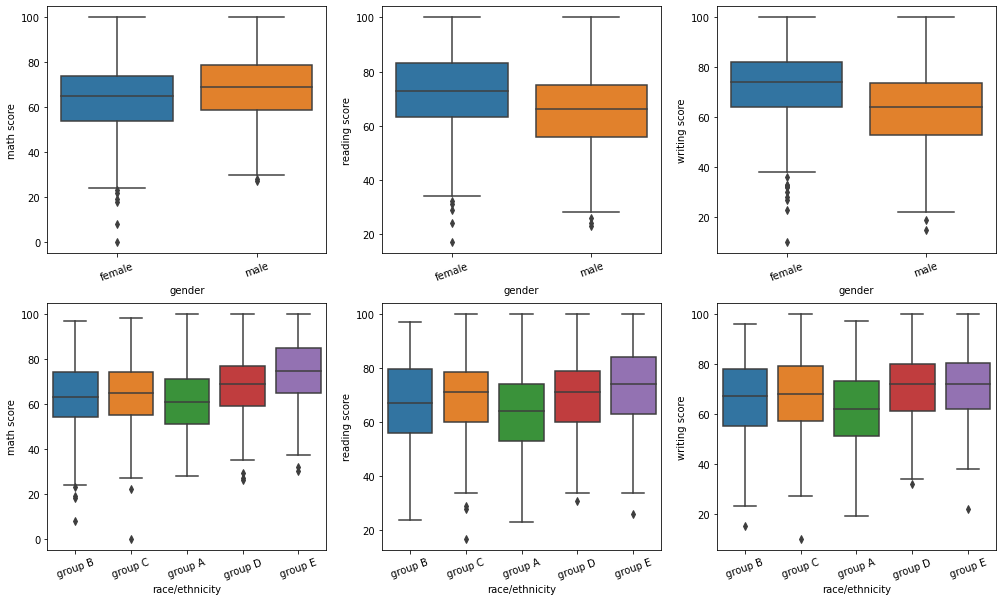

In [12]:
# Check exam score quartiles allocation for gender and race
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['gender', 'race/ethnicity']
boxpl(data, x_cols, y_cols)

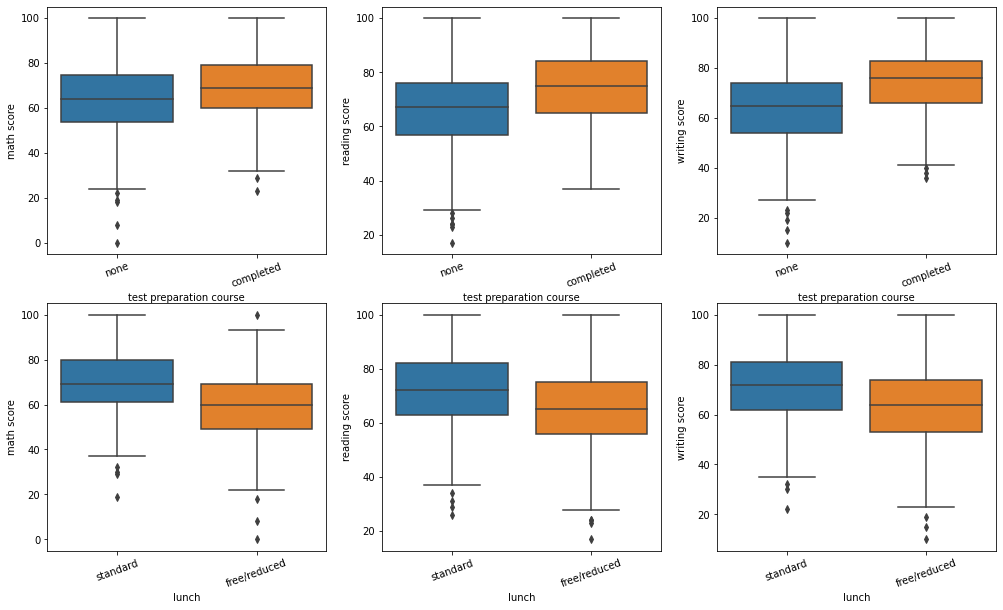

In [13]:
# Check exam score quartiles allocation for test preparation course and lunch variables
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['test preparation course', 'lunch']
boxpl(data, x_cols, y_cols)

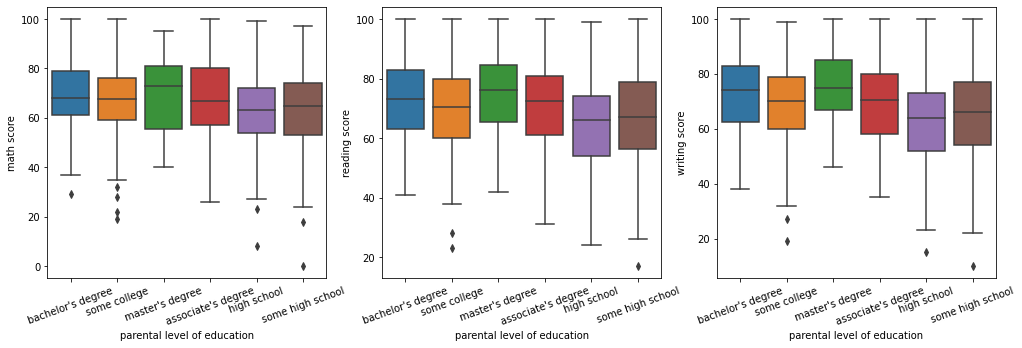

In [14]:
# Check Score quartiles allocation for parental level of education
y_cols = ['math score', 'reading score', 'writing score']
x_cols = [ 'parental level of education']
boxpl(data, x_cols, y_cols)

In [15]:
# Define function that takes a grade mark and returns the number of students that have the given grade for each exam.
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt
    
def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )

In [16]:
# Get number of students that have Failed (F), and number of students that have distinction results (A) in the exams.
print('F')
MarkCounts(data, ['F'])
print('\n A')
MarkCounts(data, ['A'])

F
Math: 150 
 Writing: 124 
 Reading: 97 
 
 Math and Reading: 66 
 Math and Writing: 78 
 Reading and Writing: 85 
 
 All: 62

 A
Math: 50 
 Writing: 68 
 Reading: 62 
 
 Math and Reading: 26 
 Math and Writing: 28 
 Reading and Writing: 46 
 
 All: 23


#### Add relative rations per variable

(for example, exam grades for females in total will give 1, and the number on plot will be percentage of females that have got the particular exam mark)

Plot heatmap with math, reading and writing marks on x axis, and different variables on y axis, and showing the relative percentage of students that got the given score within the y variable value.

Plot shows students of which of the variable values are getting better grades, and which of the variable values are getting less grades or even fail.

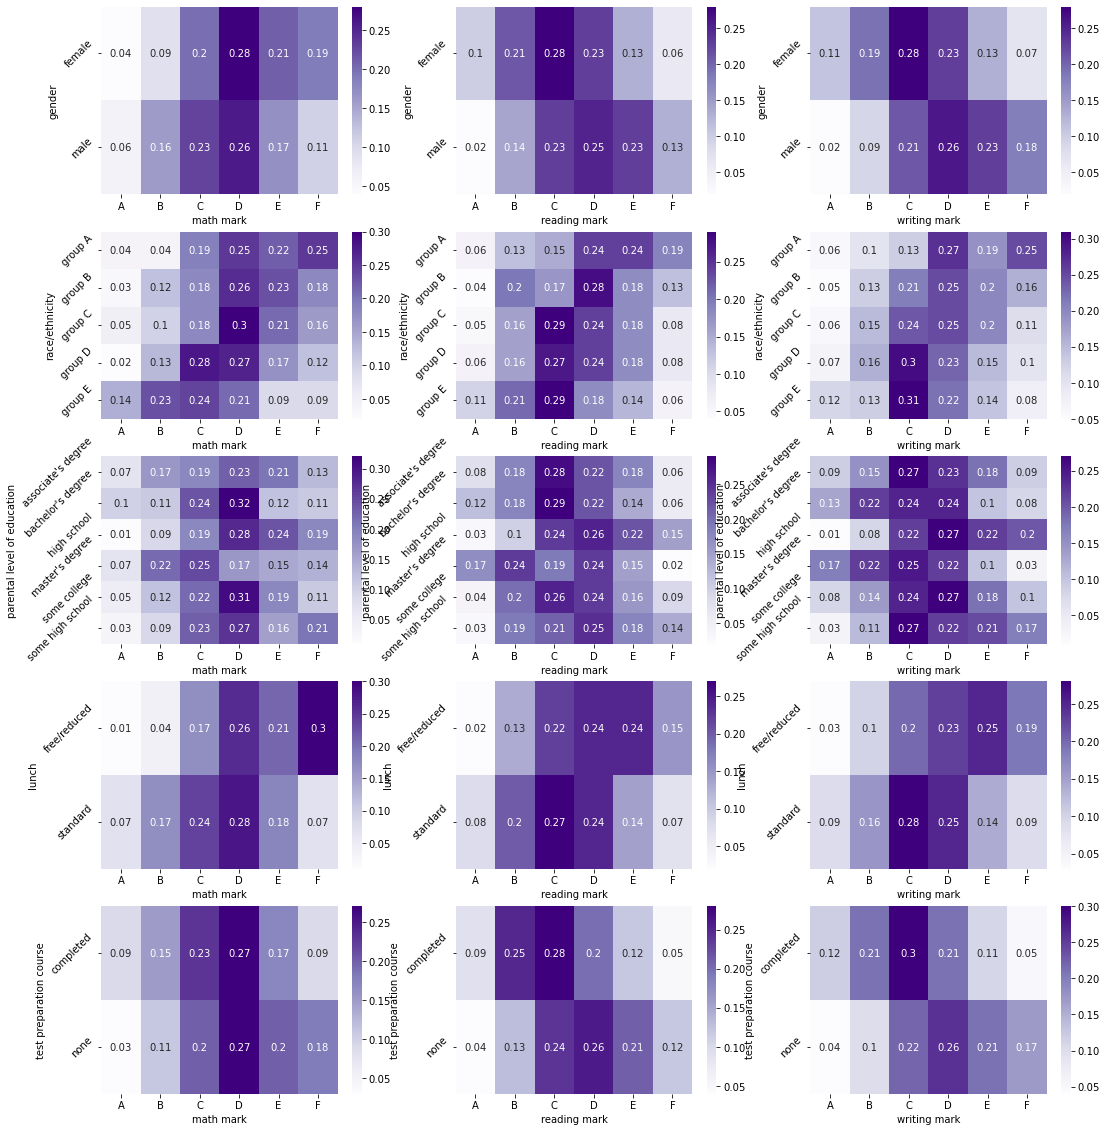

In [18]:
# Relative ratios have been added.

figure = plt.figure(figsize=(18,20))
n = 1
for k in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    for i in ['math mark', 'reading mark', 'writing mark']:
        tab = pd.crosstab(data[k], data[i])
        tab['total'] = (tab['A'] + tab['B'] + tab['C'] + tab['D'] + tab['E'] + tab['F'])        
        tab['A'] = round(tab['A'] / tab['total'], 2)
        tab['B'] = round(tab['B'] / tab['total'], 2)
        tab['C'] = round(tab['C'] / tab['total'], 2)
        tab['D'] = round(tab['D'] / tab['total'], 2)
        tab['E'] = round(tab['E'] / tab['total'], 2)
        tab['F'] = round(tab['F'] / tab['total'], 2)
        tab = tab.drop(columns=['total'])
        ax = figure.add_subplot(5, 3, n)
        #ax.set_title(i)
        g = sns.heatmap(tab, annot=True, cmap='Purples', fmt='g')
        g.set_yticklabels(g.get_yticklabels(), rotation=45)
        n = n + 1

# Step 3) Data Modeling

## Predicting student exam failures with Classification methods

### Import libraries from sklearn

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# modify the label: failed = 1 (if student has failed 1 or more exams) and failed = 0 (if student has not failed any exam)
def hasFailed(dt):
    if ((dt['math mark'] == 'F') | (dt['reading mark'] == 'F') | (dt['writing mark'] == 'F')):
        return 1
    else:
        return 0
data['failed'] = data.apply(hasFailed, axis=1)

In [21]:
# Add one hot encoding: transform textual variables into binaries
classification_data = data[[
                              'gender'
                            , 'race/ethnicity'
                            , 'parental level of education'
                            , 'lunch'
                            , 'test preparation course'
                            , 'failed'
                           ]]

In [22]:
text_columns = [
  'gender'
, 'race/ethnicity'
, 'parental level of education'
, 'lunch'
, 'test preparation course'] 

classification_data = pd.get_dummies(classification_data, columns=text_columns)
classification_data.head(6)

,failed,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1


In [23]:
# split dataset into working train/test and validation datasets (80/20). models will be trained and tested on main working dataset, but for validation the models results we will use validation dataset
#Splitting data into main training and validation datasets, 80/20
classification_data.reset_index(level=[0], inplace=True)
data_train = classification_data.sample(int(np.floor(classification_data.shape[0] * 0.8)), random_state=999)
data_val = classification_data[np.logical_not(classification_data['index'].isin(data_train['index']))]
data_train = data_train.drop(columns = ['index'])
data_val = data_val.drop(columns = ['index'])
print(data_train[data_train['failed'] == 0].shape
    , data_train[data_train['failed'] == 1].shape
     , data_val.shape)

(648, 18) (152, 18) (200, 18)


In [24]:
##working dataset is unbalanced, so we need balance it. We will use oversampling method
#Oversampling: ge the needed oversample values

data_train_fail = data_train[data_train['failed'] == 1]
data_train_pass = data_train[data_train['failed'] == 0]

pass_n = data_train[data_train['failed'] == 0].shape[0]
fail_n = data_train[data_train['failed'] == 1].shape[0]
times_x = np.floor(pass_n / fail_n)
diff = int(pass_n - times_x * fail_n)

print(times_x, diff)

4.0 40


In [25]:
#Oversampling: concatenating oversampled data together.
data_train_over = pd.concat([data_train_pass, 
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail,
                            data_train_fail.sample(diff, random_state = 999)])
print(data_train_over[data_train_over['failed'] == 0].shape
    , data_train_over[data_train_over['failed'] == 1].shape
     , data_train_over.shape)

(648, 18) (648, 18) (1296, 18)


In [26]:
#Split working dataset into test/train datasets and y labels
#test_train_sample
X_train, X_test, y_train, y_test = train_test_split(
    data_train_over[data_train_over.columns.difference(['failed'])],
    data_train_over['failed'], test_size=0.3, random_state=999)

In [31]:
#perform Gridsearch to find out best fitting parameters for random forest classifier
param_grid = { 
    'n_estimators': [8,9,10,11, 12,13, 14, 15, 16, 17, 18, 19, 20],
    'max_depth' : [5, 10, 15, 17, 18, 19, 20, 21, 23, 25],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 19}

### fit the different models: SVM, SVM Poly, SVM rdf, random forest, decision tree, knn with various number of nearest neighbours.

In [33]:

# SVM
svm = SVC(kernel = "linear").fit(X_train, y_train)
svm_poly = SVC(kernel = "poly", degree = 2, gamma = "auto").fit(X_train, y_train)
svm_rbf = SVC(kernel = "rbf", gamma="auto").fit(X_train, y_train)

#Random Forest
rf = RandomForestClassifier(n_estimators=19, max_depth = 15, criterion = 'gini', random_state = 999).fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(X_train, y_train)

# knn
knn1 = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn7 = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn9 = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
knn11 = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
knn13 = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)
knn25 = KNeighborsClassifier(n_neighbors = 25).fit(X_train, y_train)

In [34]:
# run prediction on fitted model and get accuracy score.
acc1 = accuracy_score(y_test, svm.predict(X_test))
acc2 = accuracy_score(y_test, svm_poly.predict(X_test))
acc3 = accuracy_score(y_test, svm_rbf.predict(X_test))

acc4 = accuracy_score(y_test, rf.predict(X_test))

acc5 = accuracy_score(y_test, dt.predict(X_test))

acc6 = accuracy_score(y_test, knn1.predict(X_test))
acc7 = accuracy_score(y_test, knn3.predict(X_test))
acc8 = accuracy_score(y_test, knn5.predict(X_test))
acc9 = accuracy_score(y_test, knn7.predict(X_test))
acc10 = accuracy_score(y_test, knn9.predict(X_test))
acc11 = accuracy_score(y_test, knn11.predict(X_test))
acc12 = accuracy_score(y_test, knn13.predict(X_test))
acc13 = accuracy_score(y_test, knn25.predict(X_test))

print('\n svm', acc1
      , '\n svm poly', acc2
      , '\n svm rbf', acc3
      , '\n random forest', acc4
      , '\n decision tree', acc5
      , '\n 1nn', acc6
      , '\n 3nn', acc7
      , '\n 5nn', acc8
      , '\n 7nn', acc9
      , '\n 9nn', acc10
      , '\n 11nn', acc11
      , '\n 13nn', acc12
      , '\n 25nn', acc13)
 


 svm 0.6760925449871465 
 svm poly 0.6760925449871465 
 svm rbf 0.6915167095115681 
 random forest 0.7326478149100257 
 decision tree 0.712082262210797 
 1nn 0.7197943444730077 
 3nn 0.7146529562982005 
 5nn 0.6940874035989717 
 7nn 0.6735218508997429 
 9nn 0.6966580976863753 
 11nn 0.7172236503856041 
 13nn 0.7172236503856041 
 25nn 0.7069408740359897


In [35]:
# Run models on validation dataset and see the results of accuracy there.
val_x = data_val[data_val.columns.difference(['failed'])]
val_y = data_val['failed']
train_x = data_train[data_train.columns.difference(['failed'])]
train_y = data_train['failed']

print('SVM rbf', accuracy_score(val_y, 
               SVC(kernel = "rbf", gamma="auto").fit(train_x, train_y).predict(val_x)))

print('random forest', accuracy_score(val_y, 
               RandomForestClassifier(n_estimators=12, max_depth = 10, criterion = 'gini', random_state = 999).fit(train_x, train_y).predict(val_x)))


print('decision tree', accuracy_score(val_y, 
               DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_x, train_y).predict(val_x)))


print('3nn KNN', accuracy_score(val_y,
               KNeighborsClassifier(n_neighbors = 3).fit(train_x, train_y).predict(val_x)))

SVM rbf 0.74
random forest 0.725
decision tree 0.715
3nn KNN 0.735


In [37]:
# Check Confusion matrix for each of those model predictions on validation data
from sklearn.metrics import confusion_matrix

print('SVM rbf')
y_pred = SVC(kernel = "rbf", gamma="auto").fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))



print(' \n Random Forest')
y_pred = RandomForestClassifier(n_estimators=12, max_depth = 10, criterion = 'gini', random_state = 999).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))


print(' \n Decision Tree')
y_pred = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))


print(' \n KNN 3 nearest neighbours')
y_pred = KNeighborsClassifier(n_neighbors = 3).fit(train_x, train_y).predict(val_x)
confusion_matrix_result = confusion_matrix(val_y, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)
tn, fp, fn, tp = confusion_matrix_result.ravel()
print('True Negative: ' + str(tn), ', False Positive: ' + str(fp), ', False Negative: ' + str(fn), ', True Positive: ' + str(tp))

SVM rbf
Confusion matrix:
[[148   0]
 [ 52   0]]
True Negative: 148 , False Positive: 0 , False Negative: 52 , True Positive: 0
 
 Random Forest
Confusion matrix:
[[136  12]
 [ 43   9]]
True Negative: 136 , False Positive: 12 , False Negative: 43 , True Positive: 9
 
 Decision Tree
Confusion matrix:
[[137  11]
 [ 46   6]]
True Negative: 137 , False Positive: 11 , False Negative: 46 , True Positive: 6
 
 KNN 3 nearest neighbours
Confusion matrix:
[[135  13]
 [ 40  12]]
True Negative: 135 , False Positive: 13 , False Negative: 40 , True Positive: 12


## Step 4) Conclusion


There are few conclusions below:
1. Parents' education level may affect the performance of students, but not the important one.
2. Finishing preparation course is benefitial. 
3. Having lunch is important to students, and it is also the most significant   one.
4. Gender has no correlation with the score.
​
In summary, if students want to have good performance, they should have enough nutrient and make effort to prepare the test.  

##### Seems that the model with the best accuracy score, SVM with rbf, only predicts negatives. Since the validation data is unbalanced, it gets high accuracy. In the other words, the best performing model in our case has same accuracy as the randomly predicting model - the one that only predicts negatives.